
# **Hackathon: Team Features**
### *Modeling and Scores*
---

##### Import Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, plot_roc_curve, roc_auc_score, recall_score, precision_score, f1_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler

##### Read in Cleaned Data

In [7]:
df = pd.read_csv('../data/cleaned_large_train_sample.csv')

##### Choosing Variables 

In [8]:
# Creating Dummy Variables
df=pd.get_dummies(df,columns=['workclass','marital-status', 'occupation', 'relationship', 'sex'],drop_first=True)

In [9]:
# Features and Target
X = df[pd.DataFrame(abs(df.corr()["wage"]).sort_values(ascending = False)).iloc[1:,:].reset_index().rename(columns = {"index" : "feature", "wage" : "corr"})["feature"][:20]]
y = df['wage']

In [10]:
# Split the data into the Training and Testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

##### Modeling

In [11]:
#baseline accuracy
y.value_counts(normalize = True)

0    0.75919
1    0.24081
Name: wage, dtype: float64

##### KNN

In [12]:
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.fit_transform(X_test)

In [13]:
knn=KNeighborsClassifier()
#setting up parameters
pgrid={'n_neighbors':[1,3,5,7,9,11],'weights': ['distance','uniform'],}

#instantiate GridSearchCV
gs=GridSearchCV(estimator=knn,param_grid=pgrid , cv=5)

#fitting with train data
gs.fit(X_train_sc,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11],
                         'weights': ['distance', 'uniform']})

In [14]:
gs.best_params_

{'n_neighbors': 11, 'weights': 'uniform'}

In [15]:
preds1=gs.predict(X_train_sc)
f1_score(y_train,preds1) # training f1

0.6860443450717347

In [16]:
preds=gs.predict(X_test_sc)
f1_score(y_test,preds) #testing f1

0.6370656370656371

##### RandomForest

In [17]:
rf = RandomForestClassifier(n_estimators=100)

In [18]:
rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 3, 4, 5],
}
gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.8490990990990991


{'max_depth': 5, 'n_estimators': 100}

In [19]:
preds = gs.predict(X_train)
f1_score(y_train, preds)

0.6083289404322615

In [20]:
preds2 = gs.predict(X_test)
f1_score(y_test, preds2)

0.6175

##### GradientBoosting

In [21]:
gb = GradientBoostingClassifier(random_state=222)

In [22]:
pgrid = {
    'learning_rate': [0.1, 1, 10],
    'n_estimators': [10, 100],
    'max_depth': [None, 1, 2, 3]
}

gs2 = GridSearchCV(gb, pgrid, cv=5, n_jobs=6)
gs2.fit(X_train, y_train)
print(gs2.best_score_)
gs2.best_params_

0.866912366912367


{'learning_rate': 1, 'max_depth': 2, 'n_estimators': 100}

In [23]:
preds = gs2.predict(X_train)
f1_score(y_train, preds)

0.7098533283189169

In [24]:
preds2 = gs2.predict(X_test)
f1_score(y_test, preds2)

0.6920067076579094

##### Features vs Gradient Boosting Accuracy

[0.0, 0.0]
[0.5272766323024055, 0.52864]
[0.5272766323024055, 0.52864]
[0.5970377448638318, 0.5998300764655905]
[0.6194473262284258, 0.6089850249584026]
[0.622715404699739, 0.6177034804055906]
[0.625758849350892, 0.6135105204872646]
[0.6351389017931804, 0.6236203090507726]
[0.7080387048753256, 0.6933480540988132]
[0.704609595484478, 0.6918378678511937]
[0.7125820467782196, 0.6936416184971099]
[0.705705140274901, 0.6940715883668903]
[0.7065980346279831, 0.693741307371349]
[0.7075560580365555, 0.6942889137737963]
[0.7068868455620191, 0.6970629370629371]
[0.7097137494134209, 0.6936836221352711]
[0.7097800655124007, 0.6941045606229143]
[0.7099689353290032, 0.6953125000000001]
[0.7107360525082044, 0.6959666203059806]


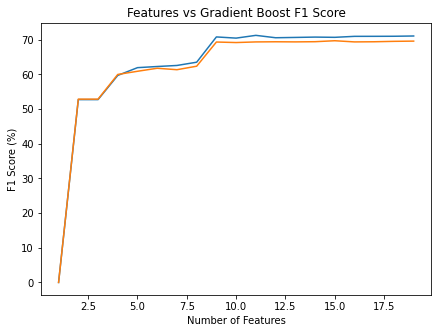

In [25]:
preds_dict = {}
for num in range(1,20):
    X = df[pd.DataFrame(abs(df.corr()["wage"]).sort_values(ascending = False)).iloc[1:,:].reset_index().rename(columns = {"index" : "feature", "wage" : "corr"})["feature"][:num]]
    y = df['wage']
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)
    gb = GradientBoostingClassifier(random_state=222, learning_rate = 1, max_depth = 2, n_estimators = 100)
    gb.fit(X_train, y_train)
    preds = gb.predict(X_train)
    train_score = f1_score(y_train, preds)
    preds = gb.predict(X_test)
    test_score = f1_score(y_test, preds)
    preds_dict[num] = [train_score, test_score]
    print(preds_dict[num])
scores_df = pd.DataFrame.from_dict(preds_dict)
scores_df = scores_df.T
scores_df.rename(columns = {0:"Train", 1:"Test"}, inplace = True)
plt.figure(figsize = (7,5))
plt.plot(scores_df["Train"]*100)
plt.plot(scores_df["Test"]*100)
#plt.xticks([3,5,8,10,13,15,18])
plt.xlabel("Number of Features")
plt.ylabel("F1 Score (%)")
plt.title("Features vs Gradient Boost F1 Score")
plt.savefig("../visualization/features_vs_accuracy.png", dpi = 192)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


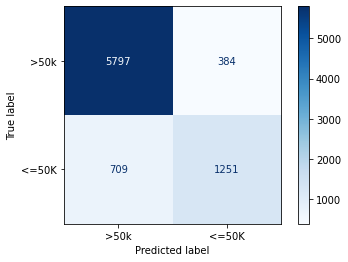

In [26]:
plot_confusion_matrix(gb,
                      X_test,
                      y_test,
                      cmap='Blues',
                      display_labels=['>50k', '<=50K']);

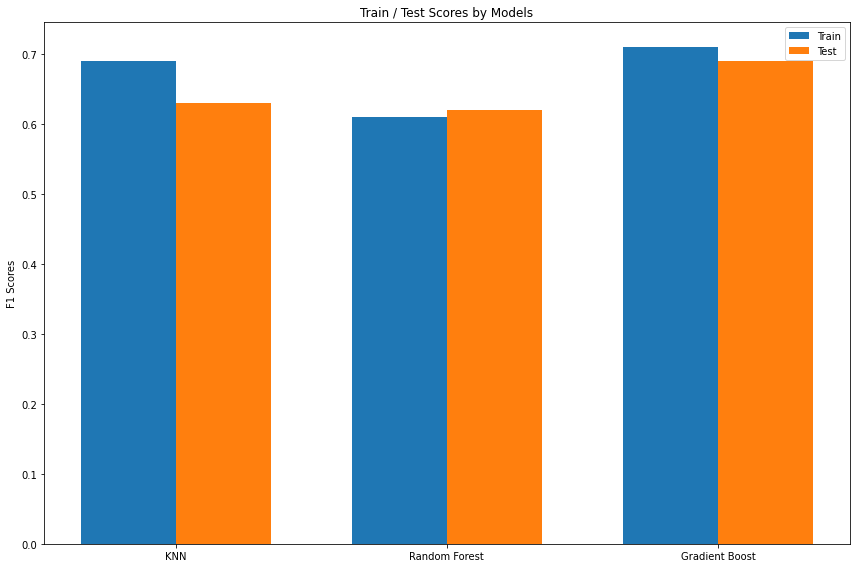

In [28]:
labels = ["KNN", "Random Forest", "Gradient Boost"]
train_scores = [0.69, 0.61, 0.71]
test_scores = [0.63, 0.62, 0.69]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (12,8))
rects1 = ax.bar(x - width/2, train_scores, width, label='Train')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1 Scores')
ax.set_title('Train / Test Scores by Models')
ax.set_xticks(x, labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.savefig("../visualization/train_test_scores.png", dpi = 192);